# Title: Netflix Movies and TV Shows Analysis and Recommendation System

### Problem Statement:
#### This project aims to build a machine learning model to predict the popularity and success of Netflix movies and TV shows based on various factors such as genre, cast, director, production year, and audience ratings. By identifying key factors that influence a show's success, Netflix and content creators can make data driven decisions to improve content recommendations and production strategies.

# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Loading the dataset

In [ ]:
# 1. Loading the Dataset
file_path = '/content/netflix_titles.csv'
df = pd.read_csv('/content/netflix_titles.csv')

In [ ]:
# 2. Displaying the first few rows of the dataset
print("First few rows of the dataset:")
df.head()

First few rows of the dataset:


,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [ ]:
# 3. Basic Information about the dataset
print("\nBasic Information:")
df.info()


Basic Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [ ]:
# 4. Summary Statistics
print("\nSummary Statistics:")
print(df.describe(include='all'))


Summary Statistics:
       show_id   type                 title       director  \
count     8807   8807                  8807           6173   
unique    8807      2                  8807           4528   
top         s1  Movie  Dick Johnson Is Dead  Rajiv Chilaka   
freq         1   6131                     1             19   
mean       NaN    NaN                   NaN            NaN   
std        NaN    NaN                   NaN            NaN   
min        NaN    NaN                   NaN            NaN   
25%        NaN    NaN                   NaN            NaN   
50%        NaN    NaN                   NaN            NaN   
75%        NaN    NaN                   NaN            NaN   
max        NaN    NaN                   NaN            NaN   

                      cast        country       date_added  release_year  \
count                 7982           7976             8797   8807.000000   
unique                7692            748             1767           NaN   
top   

# Missing values

In [ ]:
# 5. Checking for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


In [ ]:
# Dropping rows with missing values
df_cleaned = df.dropna()

### Data After Cleaning

In [ ]:
print("\nData after cleaning:")
print(df_cleaned.info())


Data after cleaning:
<class 'pandas.core.frame.DataFrame'>
Index: 5332 entries, 7 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       5332 non-null   object
 1   type          5332 non-null   object
 2   title         5332 non-null   object
 3   director      5332 non-null   object
 4   cast          5332 non-null   object
 5   country       5332 non-null   object
 6   date_added    5332 non-null   object
 7   release_year  5332 non-null   int64 
 8   rating        5332 non-null   object
 9   duration      5332 non-null   object
 10  listed_in     5332 non-null   object
 11  description   5332 non-null   object
dtypes: int64(1), object(11)
memory usage: 541.5+ KB
None


In [ ]:
df.drop_duplicates(inplace=True)

## Handling Outliers

In [ ]:
# Handling Outliers
numeric_cols = ['release_year']  # Modify as needed
for col in numeric_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

## LabelEncoder

In [ ]:
# Encoding categorical features
le = LabelEncoder()
df['type'] = le.fit_transform(df['type'])

df = pd.get_dummies(df, columns=['rating', 'country', 'director', 'cast', 'listed_in'], drop_first=True)

## Feature Engineering

In [ ]:
# Feature Engineering
df['title_length'] = df['title'].apply(lambda x: len(str(x)))
df['description_length'] = df['description'].apply(lambda x: len(str(x)))

In [ ]:
# Selecting features and target
features = ['release_year', 'title_length', 'description_length']  # Modify as needed
target = 'type'
X = df[features]
y = df[target]

In [ ]:
# Ensuring consistent data lengths
X, y = X.align(y, axis=0, join='inner')

In [ ]:
# Splitting data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Standardizing Data

In [ ]:
# Standardizing data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
# Model selection and training
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

In [ ]:
# Predictions
y_pred = model.predict(X_test)

In [ ]:
# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.6353522867737948

Classification Report:
               precision    recall  f1-score   support

           0       0.72      0.77      0.75      1120
           1       0.39      0.32      0.35       498

    accuracy                           0.64      1618
   macro avg       0.55      0.55      0.55      1618
weighted avg       0.62      0.64      0.63      1618



## Visualizations On Data

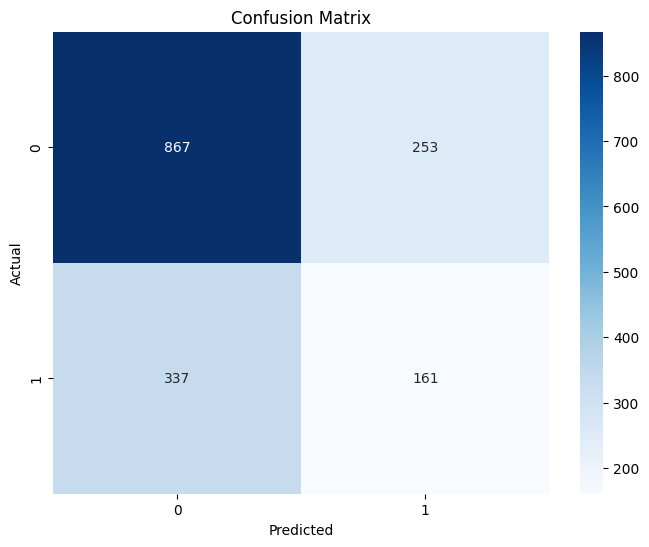

In [ ]:
# Visualization
plt.figure(figsize=(8,6))
sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

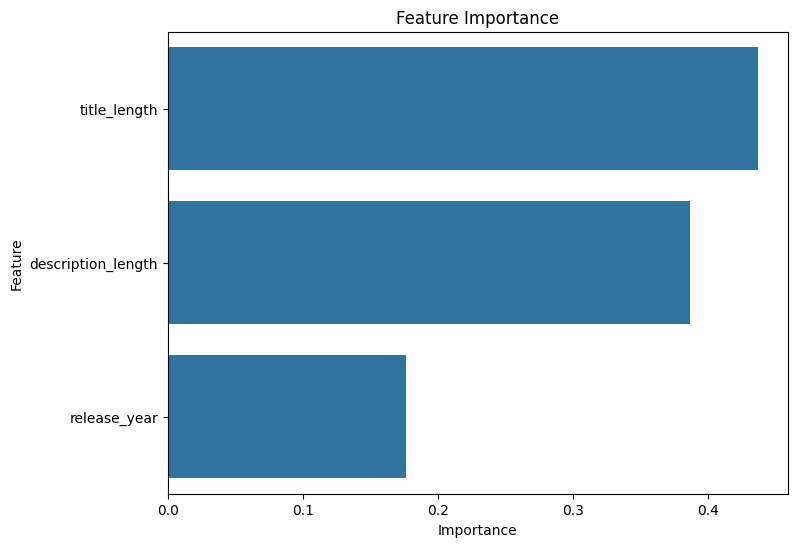

In [ ]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

In [ ]:
# Set visualization style
sns.set(style="darkgrid")

<ipython-input-26-871beb7e8437>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["type"], palette="coolwarm")


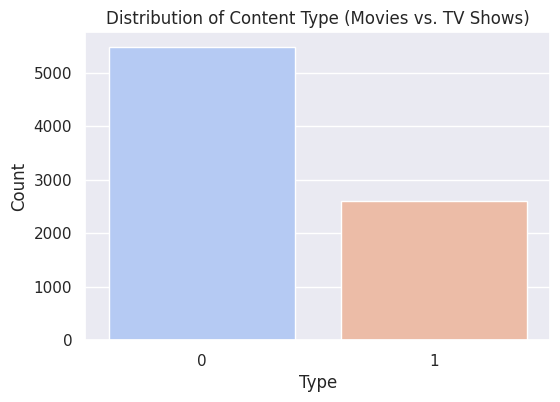

In [ ]:
# Count of Movies vs TV Shows
plt.figure(figsize=(6,4))
sns.countplot(x=df["type"], palette="coolwarm")
plt.title("Distribution of Content Type (Movies vs. TV Shows)")
plt.xlabel("Type")
plt.ylabel("Count")
plt.show()

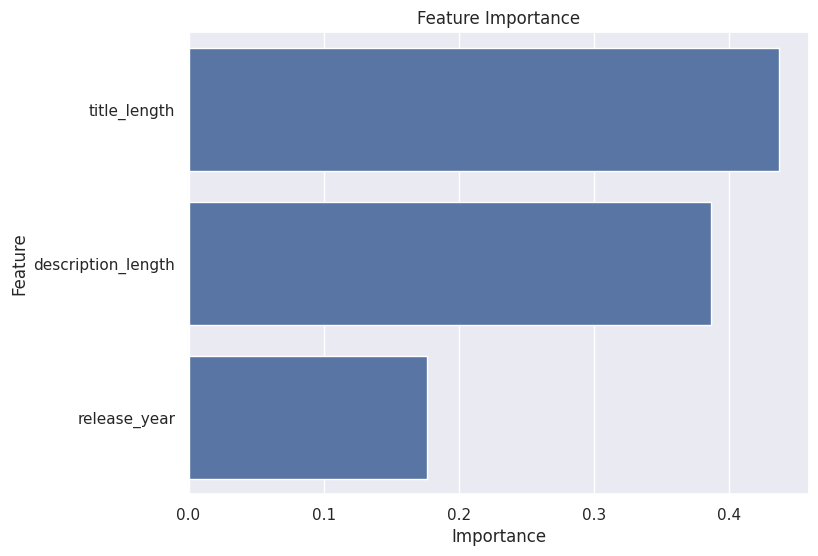

In [ ]:
# Feature Importance
feature_importance = pd.Series(model.feature_importances_, index=features).sort_values(ascending=False)
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance, y=feature_importance.index)
plt.xlabel("Importance")
plt.ylabel("Feature")
plt.title("Feature Importance")
plt.show()

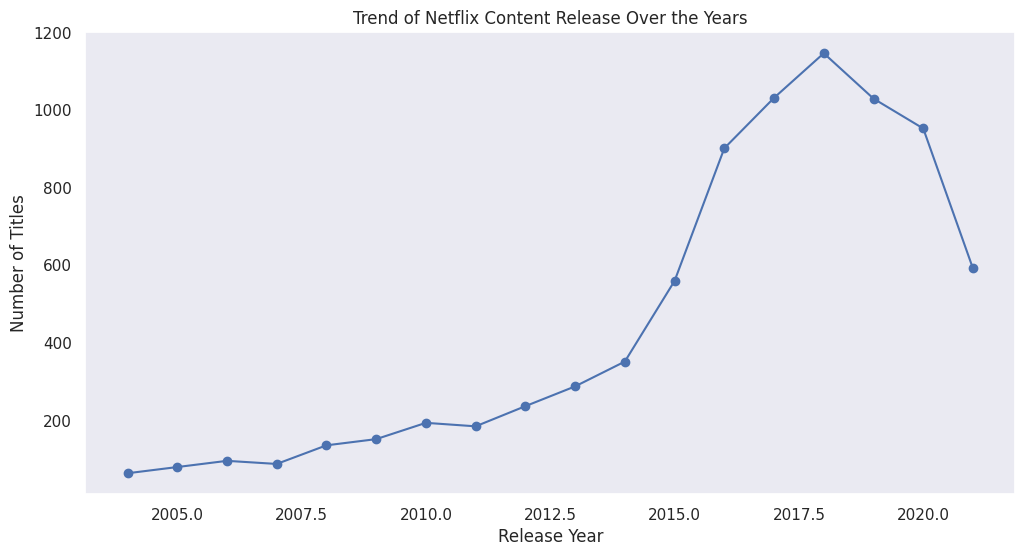

In [ ]:
# Trend of Content Release Over Years
plt.figure(figsize=(12,6))
df['release_year'].value_counts().sort_index().plot(kind='line', marker='o', color='b')
plt.title("Trend of Netflix Content Release Over the Years")
plt.xlabel("Release Year")
plt.ylabel("Number of Titles")
plt.grid()
plt.show()

In [ ]:
# Set plot style
sns.set_style("darkgrid")

<ipython-input-7-f0d9a9bfa8ff>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, x="type", palette="viridis")


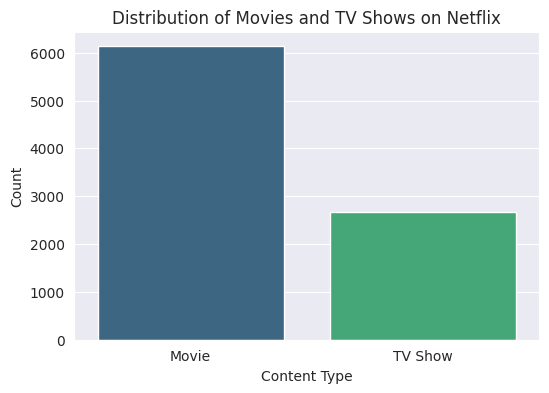

In [ ]:
# 1. Content Type Distribution
plt.figure(figsize=(6, 4))
sns.countplot(data=df, x="type", palette="viridis")
plt.title("Distribution of Movies and TV Shows on Netflix")
plt.xlabel("Content Type")
plt.ylabel("Count")
plt.show()

<ipython-input-8-cfcced7b62ff>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")


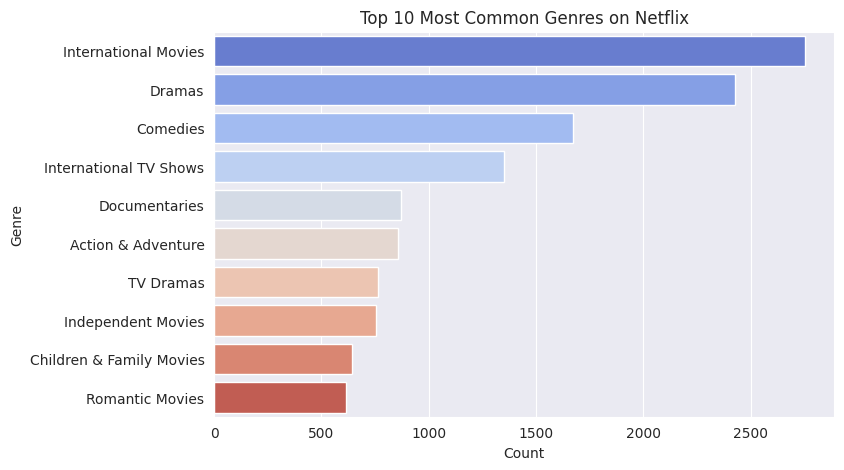

In [ ]:
# 2. Top 10 Genres
plt.figure(figsize=(8, 5))
df['listed_in'] = df['listed_in'].str.split(', ')
genres = df.explode('listed_in')
top_genres = genres['listed_in'].value_counts().nlargest(10)
sns.barplot(x=top_genres.values, y=top_genres.index, palette="coolwarm")
plt.title("Top 10 Most Common Genres on Netflix")
plt.xlabel("Count")
plt.ylabel("Genre")
plt.show()

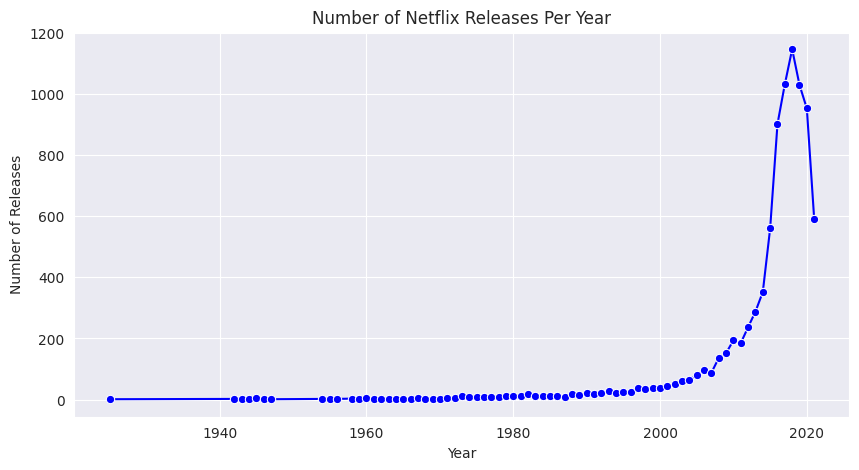

In [ ]:
# 3. Yearly Trend of Netflix Releases
plt.figure(figsize=(10, 5))
df['release_year'] = pd.to_numeric(df['release_year'], errors='coerce')
yearly_trend = df['release_year'].value_counts().sort_index()
sns.lineplot(x=yearly_trend.index, y=yearly_trend.values, marker="o", color="b")
plt.title("Number of Netflix Releases Per Year")
plt.xlabel("Year")
plt.ylabel("Number of Releases")
plt.show()

<ipython-input-10-9f99a1d254f2>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")


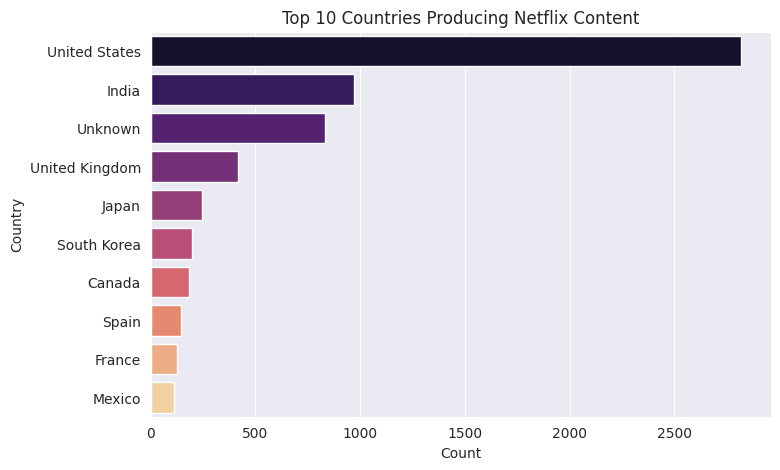

In [ ]:
# 4. Top 10 Countries Producing Content
plt.figure(figsize=(8, 5))
df['country'] = df['country'].fillna("Unknown")
top_countries = df['country'].value_counts().nlargest(10)
sns.barplot(x=top_countries.values, y=top_countries.index, palette="magma")
plt.title("Top 10 Countries Producing Netflix Content")
plt.xlabel("Count")
plt.ylabel("Country")
plt.show()

<ipython-input-11-9d649de4c223>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index, palette="pastel")


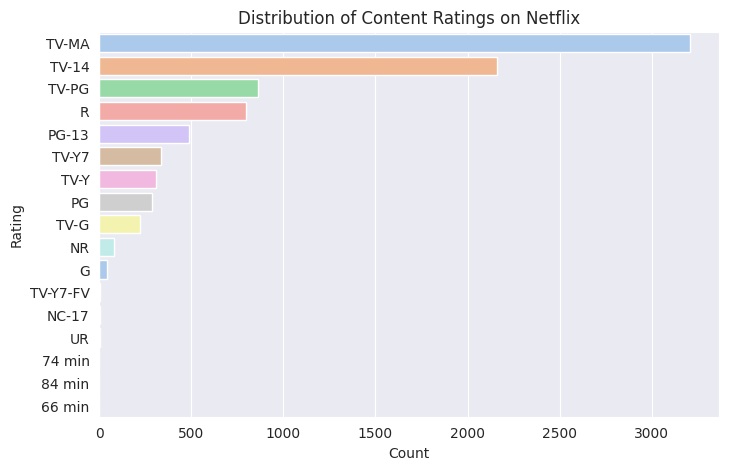

In [ ]:
# 5. Ratings Distribution
plt.figure(figsize=(8, 5))
sns.countplot(data=df, y="rating", order=df['rating'].value_counts().index, palette="pastel")
plt.title("Distribution of Content Ratings on Netflix")
plt.xlabel("Count")
plt.ylabel("Rating")
plt.show()

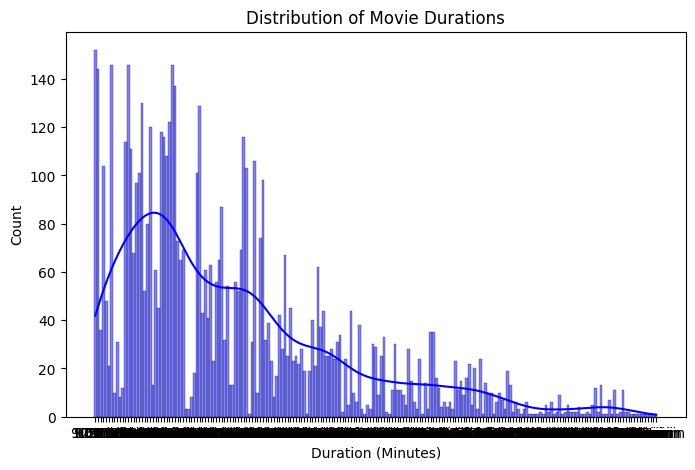

In [ ]:
# 1. Histogram of Movie Durations
plt.figure(figsize=(8, 5))
movies = df[df['type'] == "Movie"]
sns.histplot(movies['duration'].dropna(), bins=30, kde=True, color="blue")
plt.title("Distribution of Movie Durations")
plt.xlabel("Duration (Minutes)")
plt.ylabel("Count")
plt.show()

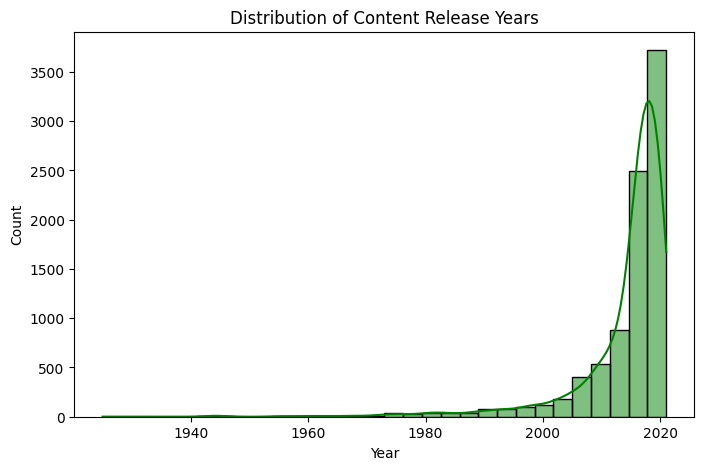

In [ ]:
# 2. Histogram of Release Year
plt.figure(figsize=(8, 5))
sns.histplot(df['release_year'].dropna(), bins=30, kde=True, color="green")
plt.title("Distribution of Content Release Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.show()